# Import Dataset and Libraries

In [ ]:
!pip install missingno

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from scipy.stats import skew, kurtosis
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
!pip install -q kaggle

from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zahramohammadbeigi","key":"7f752472bd2b22cb188ddb50425c6da3"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!!kaggle datasets download -d mirichoi0218/insurance

zip_file = "insurance.zip"
destination_dir = "/content/insurance"

if not os.path.exists(zip_file):
    print(f"Error: {zip_file} not found.")
else:
    !unzip -q $zip_file -d $destination_dir
    !rm $zip_file

In [ ]:
df = pd.read_csv('/content/insurance/insurance.csv')

# Data Analysis

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
print(f'Data size: Number of row = {df.shape[0]}, Number of columns = {df.shape[1]}')

Data size: Number of row = 1338, Number of columns = 7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df['children'] = df['children'].astype('object')

In [ ]:
numeric_columns = df.select_dtypes(include=['float64','int64']).columns
categorical_columns = df.select_dtypes(exclude='number').columns

## Summary Statistics

In [ ]:
df.describe().round(2)

,age,bmi,charges
count,1338.00,1338.00,1338.00
mean,39.21,30.66,13270.42
std,14.05,6.10,12110.01
min,18.00,15.96,1121.87
25%,27.00,26.30,4740.29
50%,39.00,30.40,9382.03
75%,51.00,34.69,16639.91
max,64.00,53.13,63770.43


In [ ]:
df.describe(include='O')

,sex,children,smoker,region
count,1338,1338,1338,1338
unique,2,6,2,4
top,male,0,no,southeast
freq,676,574,1064,364


## Visualization

In [ ]:
sns.set_style("whitegrid")
sns.set_palette("Set2")

### Histograms

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'charges'}>, <Axes: >]], dtype=object)

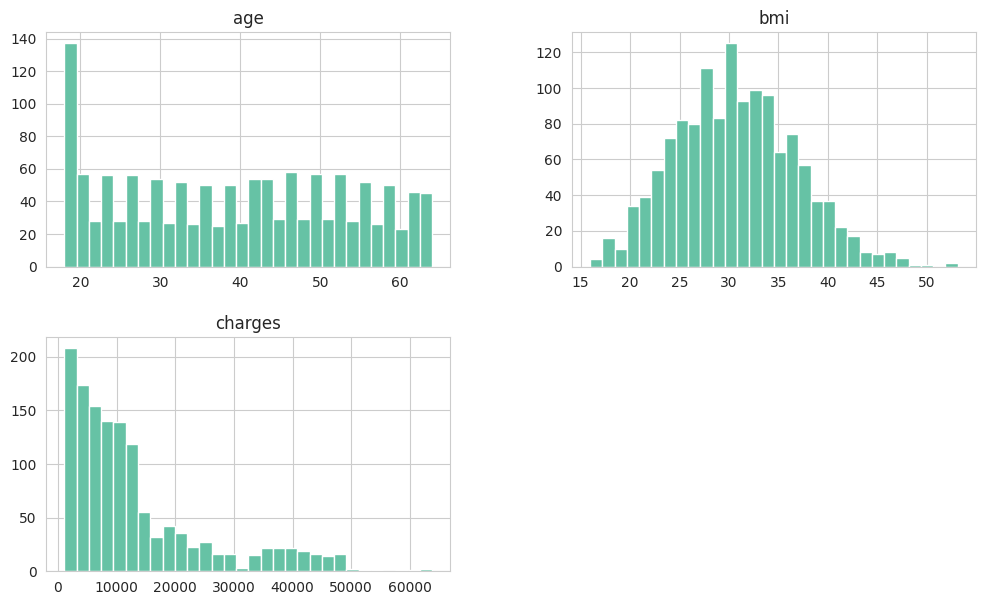

In [ ]:
df[numeric_columns].hist(bins=30, figsize=(12, 7))

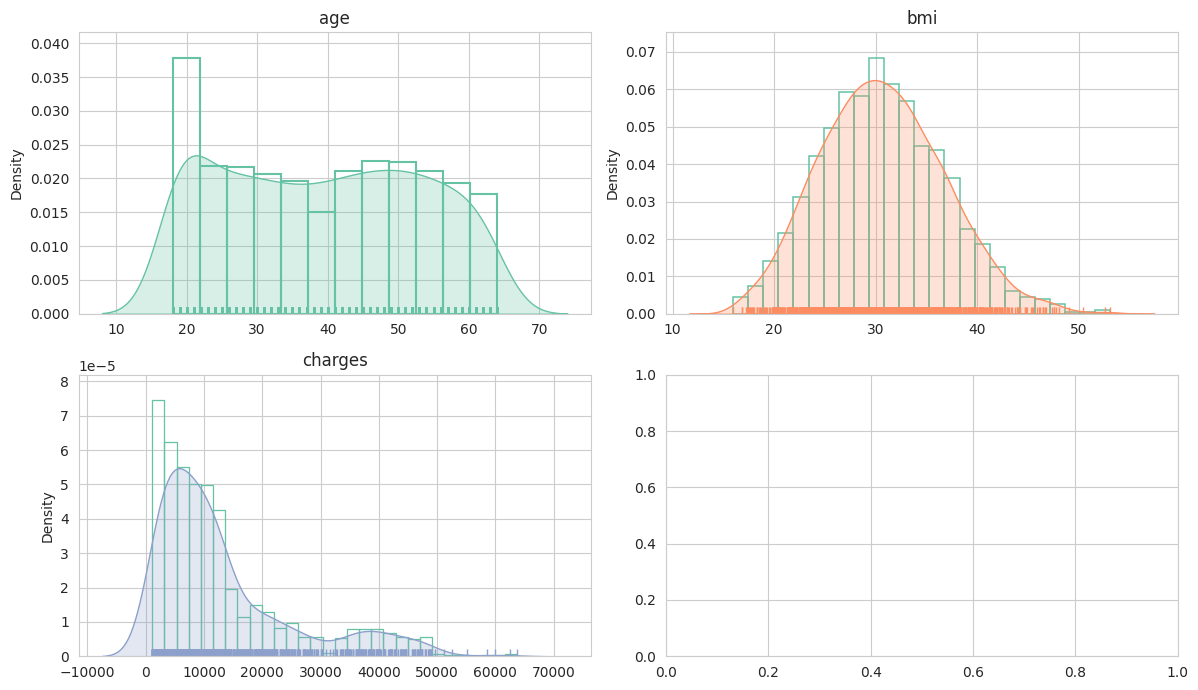

In [ ]:
colors = sns.color_palette(palette = "Set2", n_colors = 4)
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 7))
axs = axs.flat

for i, col in enumerate(numeric_columns):
    sns.histplot(df, x = col, stat = 'density', fill = False, ax = axs[i])
    sns.rugplot(df, x = col, color = colors[i], ax = axs[i])
    sns.kdeplot(df, x = col, color = colors[i], fill = True, ax = axs[i])
    axs[i].set_xlabel("")
    axs[i].set_title(f"{col}")

fig.tight_layout()
fig.show()

In [ ]:
skewness = df[numeric_columns].apply(skew)
kurt_values = df[numeric_columns].apply(kurtosis)

print("\nSkewness:")
print(skewness)

print("\nKurtosis:")
print(kurt_values)


Skewness:
age        0.055610
bmi        0.283729
charges    1.514180
dtype: float64

Kurtosis:
age       -1.244921
bmi       -0.055023
charges    1.595821
dtype: float64


### Scatter plots

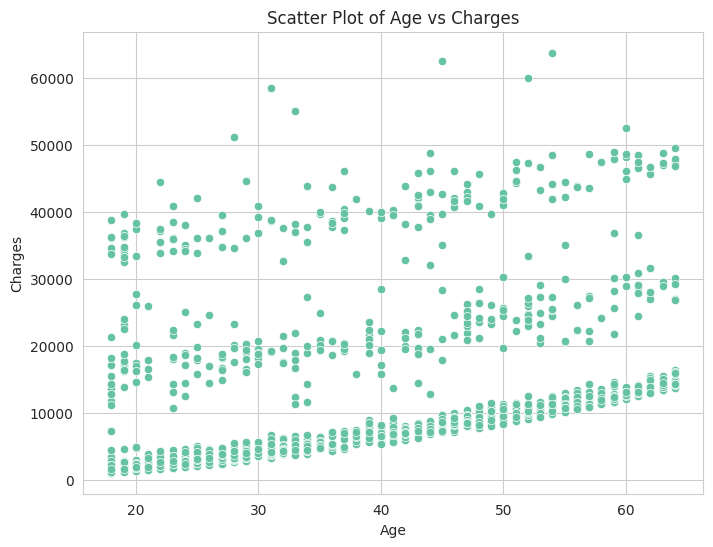

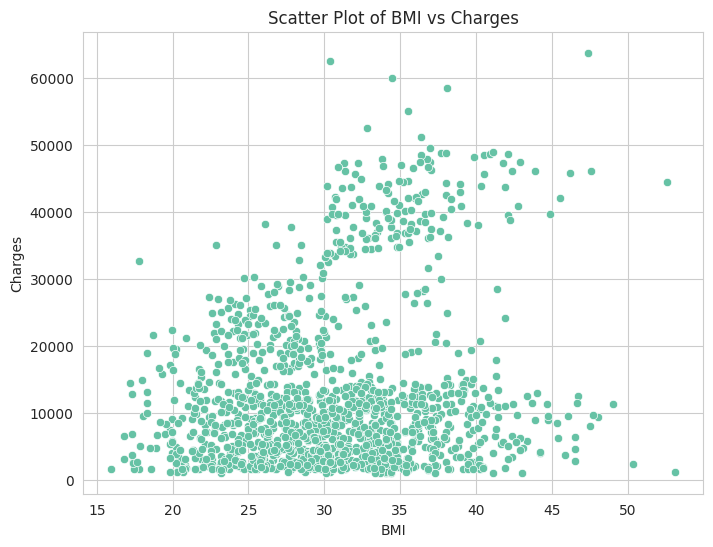

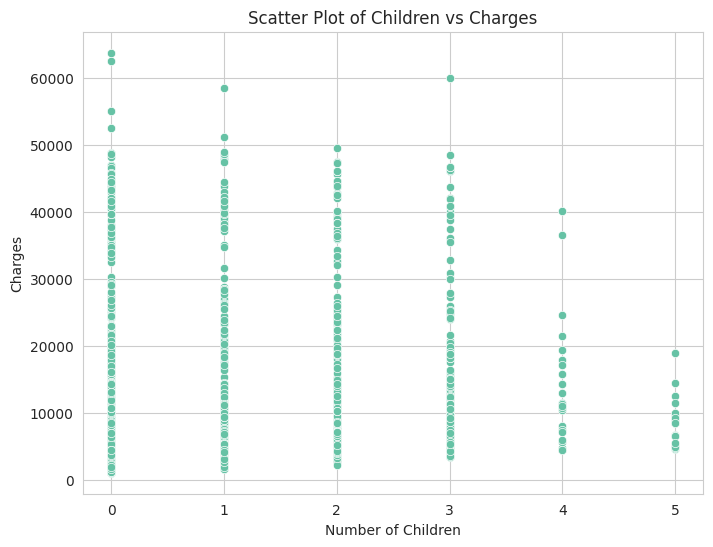

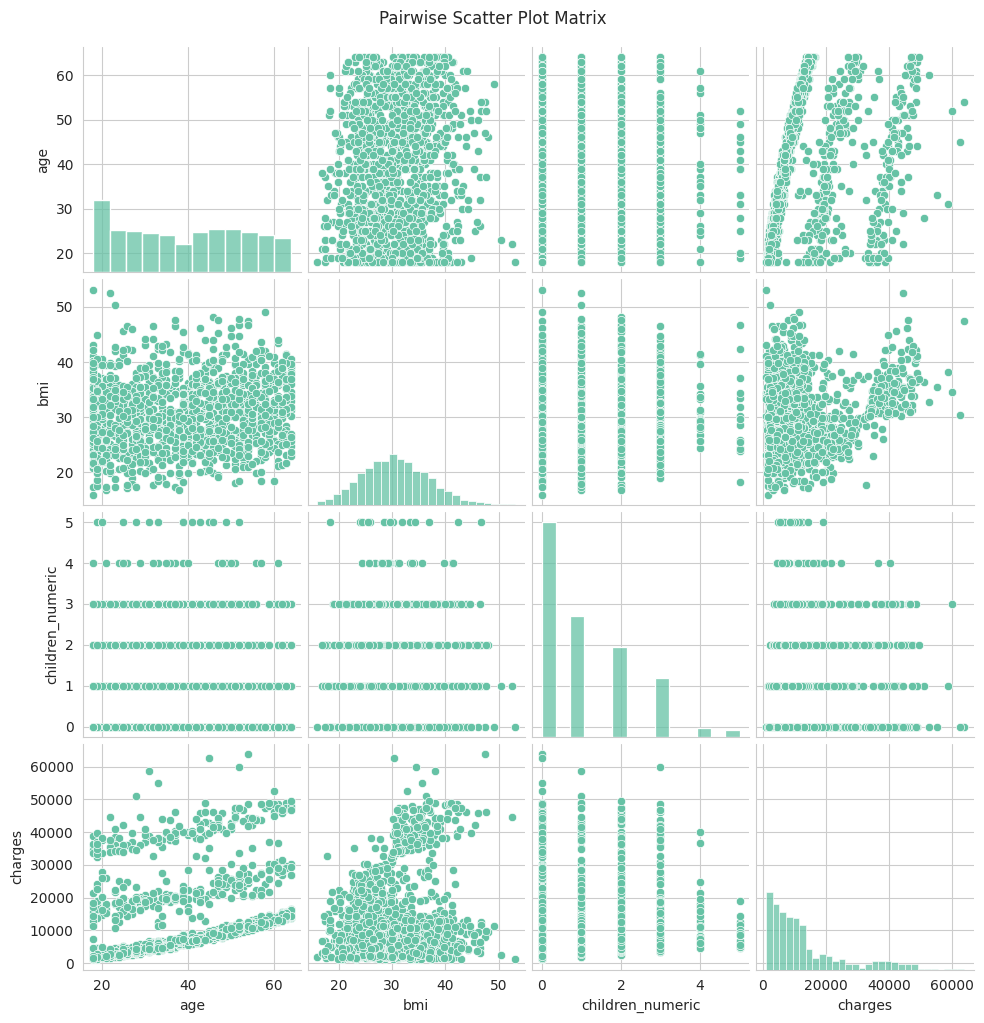

In [ ]:
# Scatter plot between 'age' and 'charges'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='charges', data=df)
plt.title('Scatter Plot of Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.grid(True)
plt.show()

# Scatter plot between 'bmi' and 'charges'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('Scatter Plot of BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.grid(True)
plt.show()

df['children_numeric'] = pd.to_numeric(df['children'])
plt.figure(figsize=(8, 6))
sns.scatterplot(x='children_numeric', y='charges', data=df)
plt.title('Scatter Plot of Children vs Charges')
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.grid(True)
plt.show()

# Scatter plot matrix for all numerical variables
sns.pairplot(df[['age', 'bmi', 'children_numeric', 'charges']])
plt.suptitle('Pairwise Scatter Plot Matrix', y=1.02)
plt.show()

df.drop(columns=['children_numeric'], inplace=True)

### Bar Plots

<ipython-input-14-1211ea48460a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df, palette="Set2").set(title='Distribution of Sex')


[Text(0.5, 1.0, 'Distribution of Sex')]

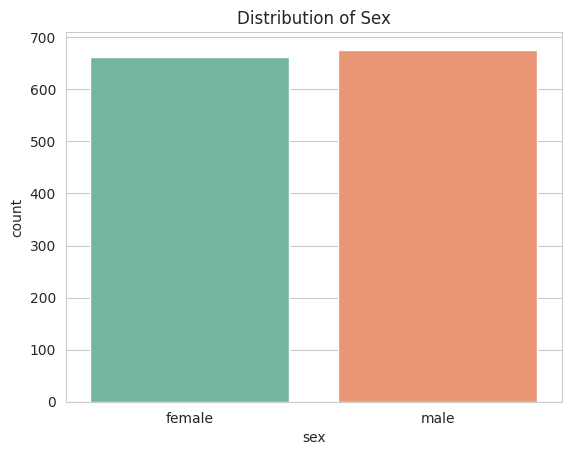

In [ ]:
sns.countplot(x='sex', data=df, palette="Set2").set(title='Distribution of Sex')

<ipython-input-15-49b52533f0ea>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='children', data=df, order=df['children'].value_counts().index, palette="Set2").set(title='Distribution of Number of Children')


[Text(0.5, 1.0, 'Distribution of Number of Children')]

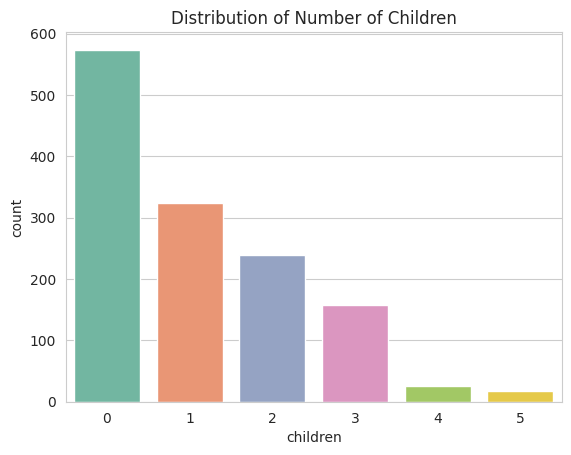

In [ ]:
sns.countplot(x='children', data=df, order=df['children'].value_counts().index, palette="Set2").set(title='Distribution of Number of Children')

<ipython-input-34-b1e166208866>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoker', data=df, palette="Set2").set(title='Distribution of Smokers')


[Text(0.5, 1.0, 'Distribution of Smokers')]

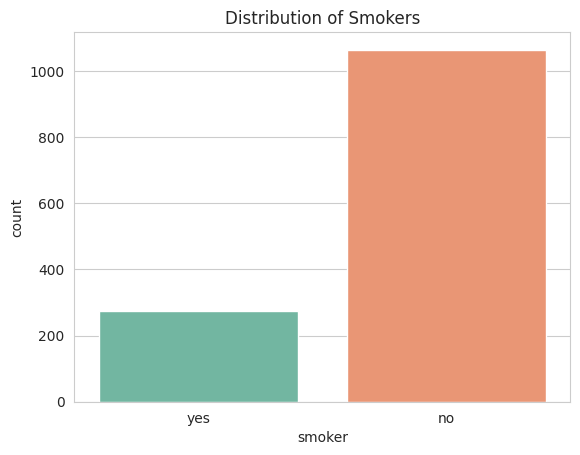

In [ ]:
sns.countplot(x='smoker', data=df, palette="Set2").set(title='Distribution of Smokers')

<ipython-input-36-49fac6fc5b9e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='region', data=df, palette="Set2").set(title='Distribution of Region')


[Text(0.5, 1.0, 'Distribution of Region')]

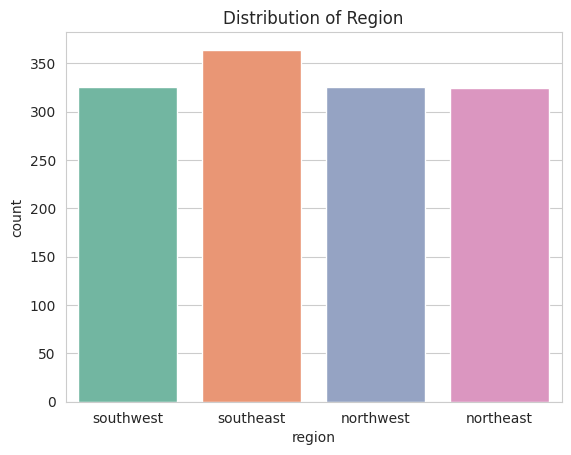

In [ ]:
sns.countplot(x='region', data=df, palette="Set2").set(title='Distribution of Region')

### Pie Chart

In [ ]:
# Function to plot a pie chart
def plot_pie_chart(df, col):
    plt.figure(figsize=(8, 8))
    df[col].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set2'))
    plt.title(f'Distribution of {col}')
    plt.ylabel('')
    plt.show()

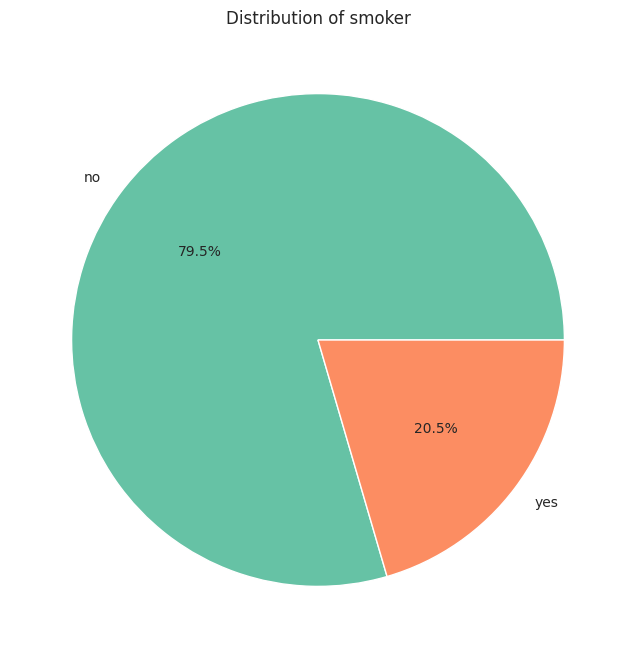

In [ ]:
plot_pie_chart(df, 'smoker')

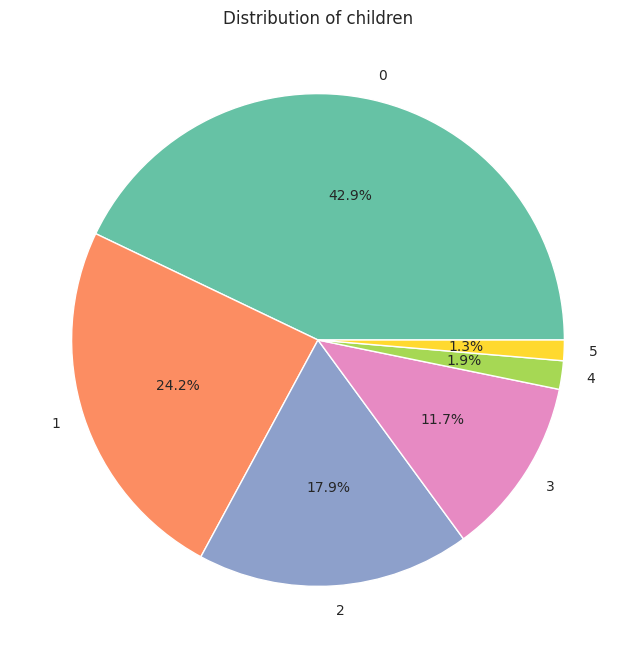

In [ ]:
plot_pie_chart(df, 'children')

In [ ]:
sex_counts = df['sex'].value_counts()
children_counts = df['children'].value_counts()
smoker_counts = df['smoker'].value_counts()
region_counts = df['region'].value_counts()

# Print counts for each variable
print("Distribution of Sex:")
print(sex_counts)
print("\nDistribution of Number of Children:")
print(children_counts)
print("\nDistribution of Smokers:")
print(smoker_counts)
print("\nDistribution of Region:")
print(region_counts)

Distribution of Sex:
sex
male      676
female    662
Name: count, dtype: int64

Distribution of Number of Children:
children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

Distribution of Smokers:
smoker
no     1064
yes     274
Name: count, dtype: int64

Distribution of Region:
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


### Correlation Matrix

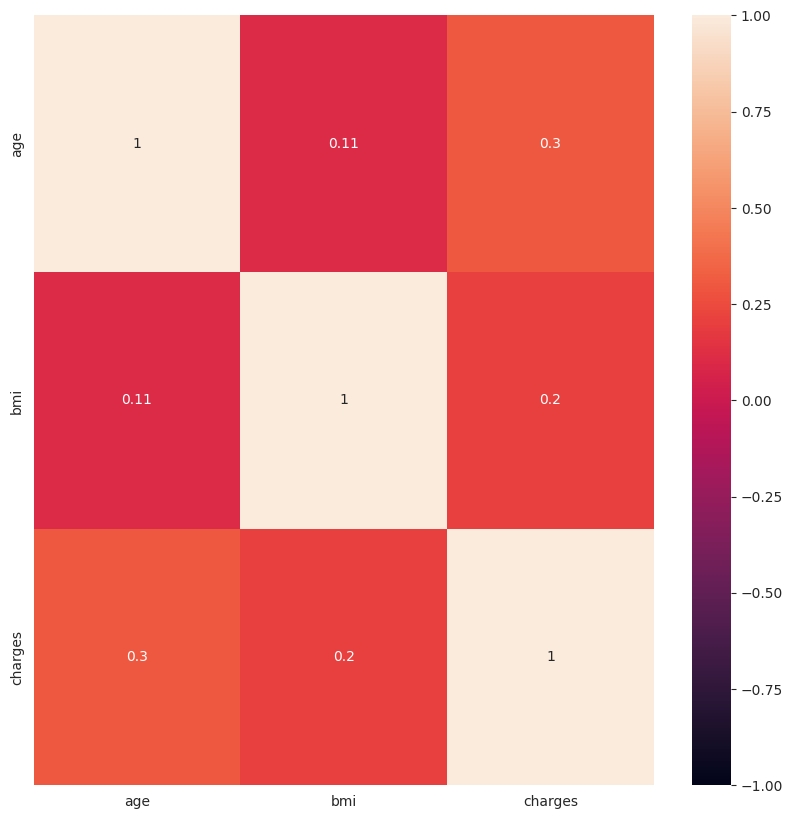

In [ ]:
fig = plt.figure(figsize=(10., 10.))
ax = sns.heatmap(df[numeric_columns].corr(), vmin=-1., vmax=1., annot=True)

In [ ]:
correlation_matrix = df[numeric_columns].corr()
percentage_correlation = correlation_matrix *100
print(percentage_correlation)

                age         bmi     charges
age      100.000000   10.927188   29.900819
bmi       10.927188  100.000000   19.834097
charges   29.900819   19.834097  100.000000


### Others

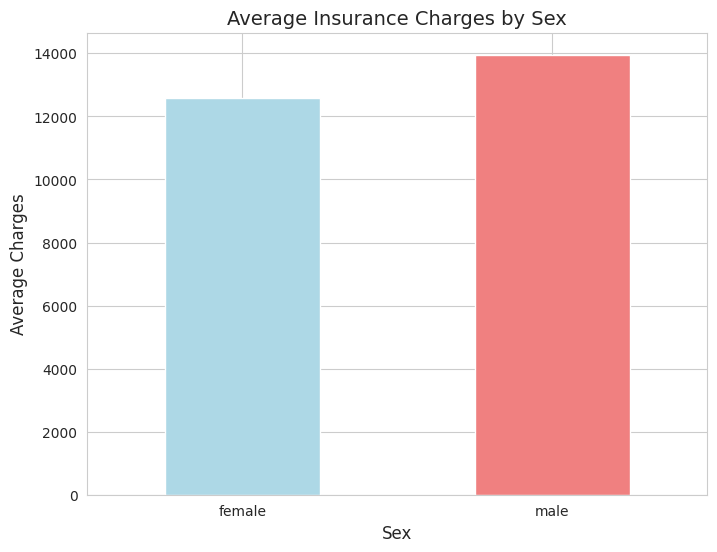

In [ ]:
sex = df.groupby(df['sex'])
sex['charges'].mean().plot(kind='bar', color=['lightblue', 'lightcoral'], figsize=(8, 6))
plt.title('Average Insurance Charges by Sex', fontsize=14)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Average Charges', fontsize=12)
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

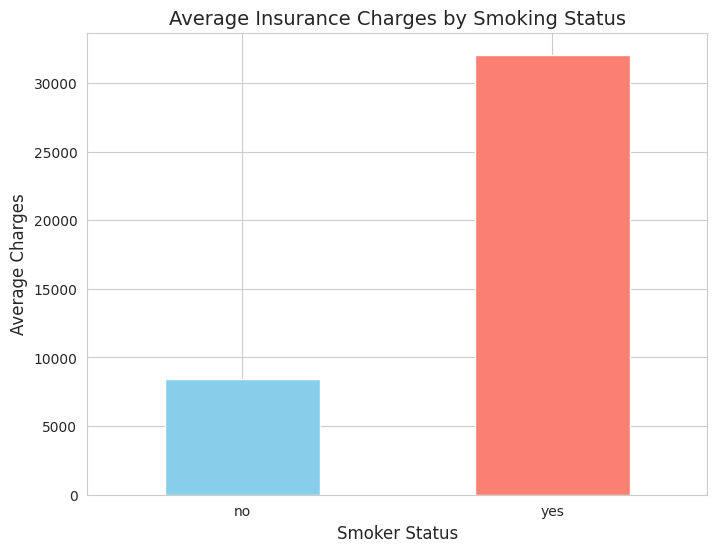

In [ ]:
smoker = df.groupby(df['smoker'])
smoker['charges'].mean().plot(kind='bar', color=['skyblue', 'salmon'], figsize=(8, 6))

plt.title('Average Insurance Charges by Smoking Status', fontsize=14)
plt.xlabel('Smoker Status', fontsize=12)
plt.ylabel('Average Charges', fontsize=12)
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

smokers spend much more money on insurance than non-smokers

<ipython-input-22-1a6602221dfd>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='charges', y='smoker', data=df, palette="Set2")


<Axes: xlabel='charges', ylabel='smoker'>

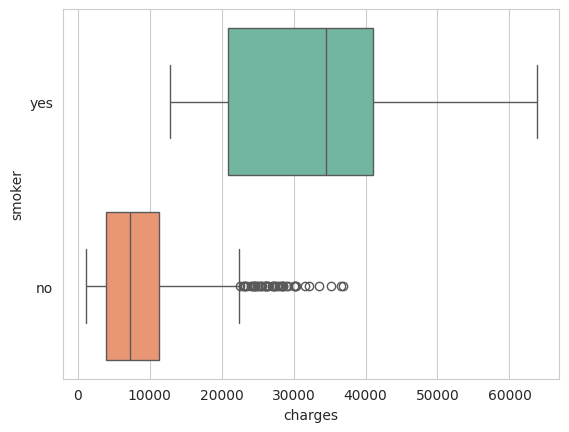

In [ ]:
sns.boxplot(x='charges', y='smoker', data=df, palette="Set2")

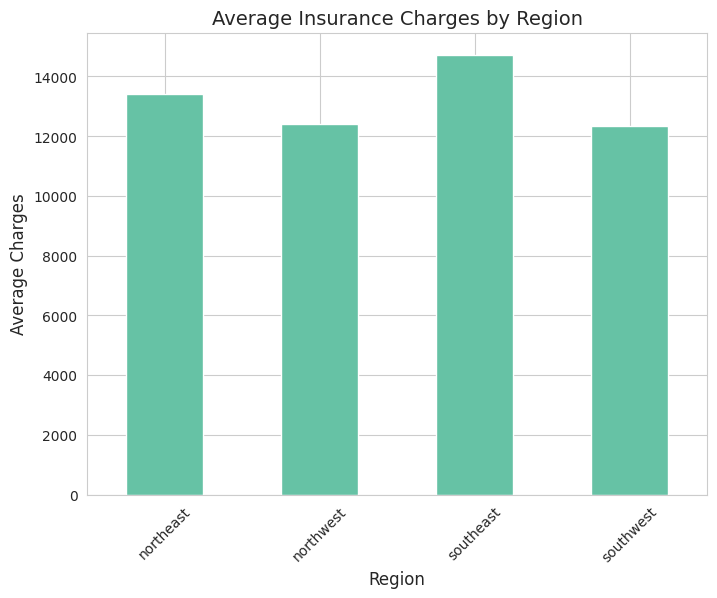

In [ ]:
region = df.groupby('region')
region['charges'].mean().plot(kind='bar', figsize=(8, 6))

plt.title('Average Insurance Charges by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Average Charges', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
df['bmi'].mean()

30.66339686098655

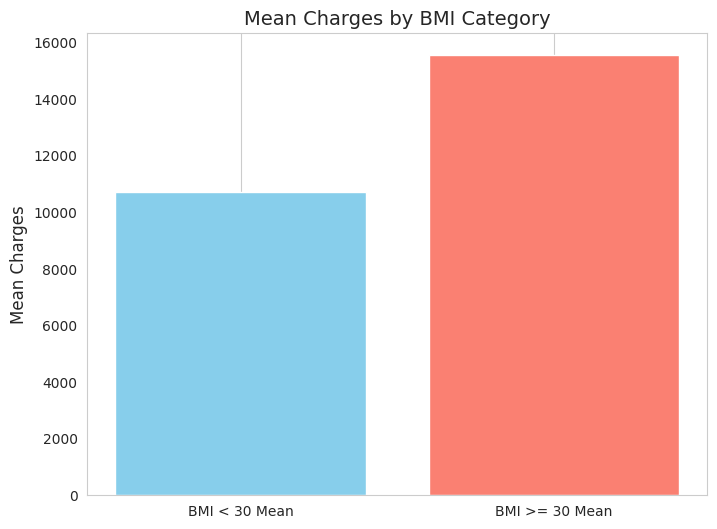

In [ ]:
mean_bmi_less_30 = df[df['bmi'] < 30]['charges'].mean()
mean_bmi_greater_30 = df[df['bmi'] >= 30]['charges'].mean()

labels = ['BMI < 30 Mean', 'BMI >= 30 Mean']
means = [mean_bmi_less_30, mean_bmi_greater_30]

plt.figure(figsize=(8, 6))
plt.bar(labels, means, color=['skyblue', 'salmon'])

plt.ylabel('Mean Charges', fontsize=12)
plt.title('Mean Charges by BMI Category', fontsize=14)
plt.grid(axis='y')
plt.show()

In [ ]:
# Average insurance charges by sex
average_charges_sex = df.groupby('sex')['charges'].mean()

# Average insurance charges by smoker status
average_charges_smoker = df.groupby('smoker')['charges'].mean()

# Average insurance charges by region
average_charges_region = df.groupby('region')['charges'].mean()

# Mean charges for BMI categories
mean_bmi_less_30 = df[df['bmi'] < 30]['charges'].mean()
mean_bmi_greater_30 = df[df['bmi'] >= 30]['charges'].mean()

# Display results
print("Average Charges by Sex:")
print(average_charges_sex)

print("\nAverage Charges by Smoker Status:")
print(average_charges_smoker)

print("\nAverage Charges by Region:")
print(average_charges_region)

print("\nMean Charges for BMI < 30:", mean_bmi_less_30)
print("Mean Charges for BMI >= 30:", mean_bmi_greater_30)


Average Charges by Sex:
sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

Average Charges by Smoker Status:
smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

Average Charges by Region:
region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

Mean Charges for BMI < 30: 10713.666900584787
Mean Charges for BMI >= 30: 15552.335468868458


In [ ]:
smoker_stats = df.groupby('smoker')['charges'].describe()
print(smoker_stats)

         count          mean           std         min           25%  \
smoker                                                                 
no      1064.0   8434.268298   5993.781819   1121.8739   3986.438700   
yes      274.0  32050.231832  11541.547176  12829.4551  20826.244213   

                50%           75%          max  
smoker                                          
no       7345.40530  11362.887050  36910.60803  
yes     34456.34845  41019.207275  63770.42801  


### Missing Value

<Figure size 1000x600 with 0 Axes>

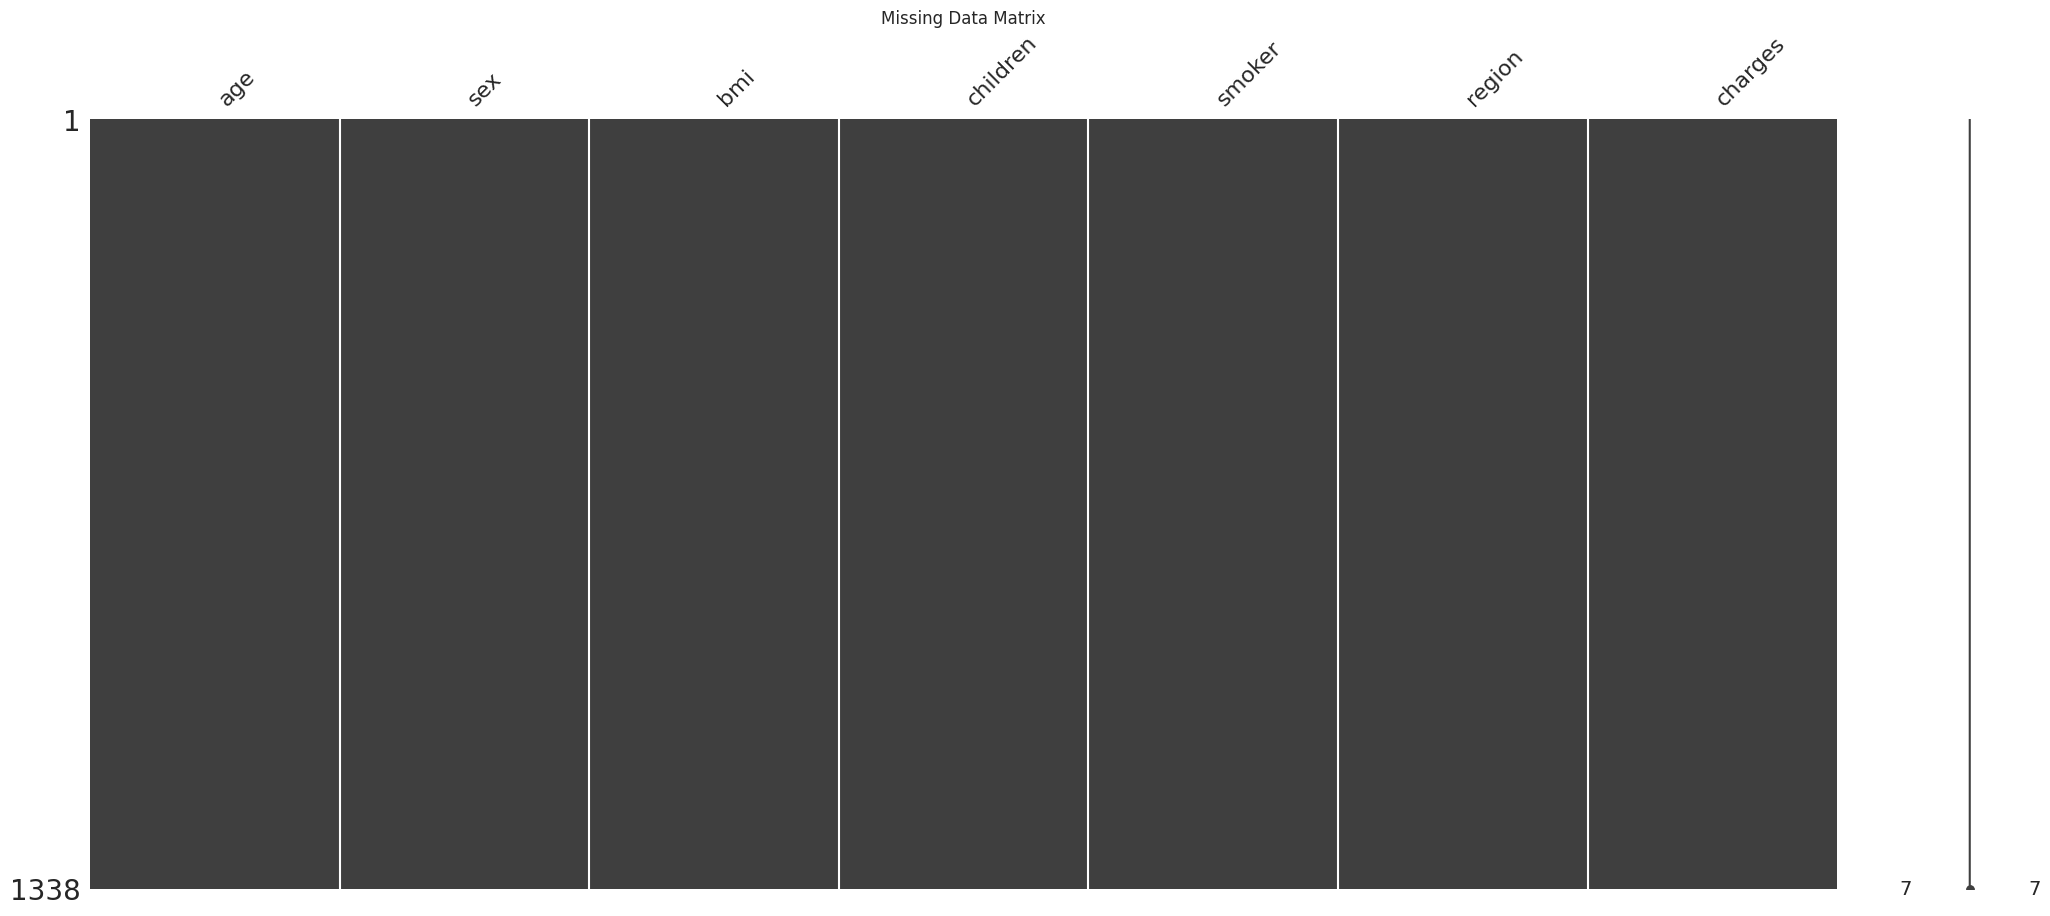

In [ ]:
plt.figure(figsize=(10, 6))
msno.matrix(df)
plt.title('Missing Data Matrix')
plt.show()

### Outliers

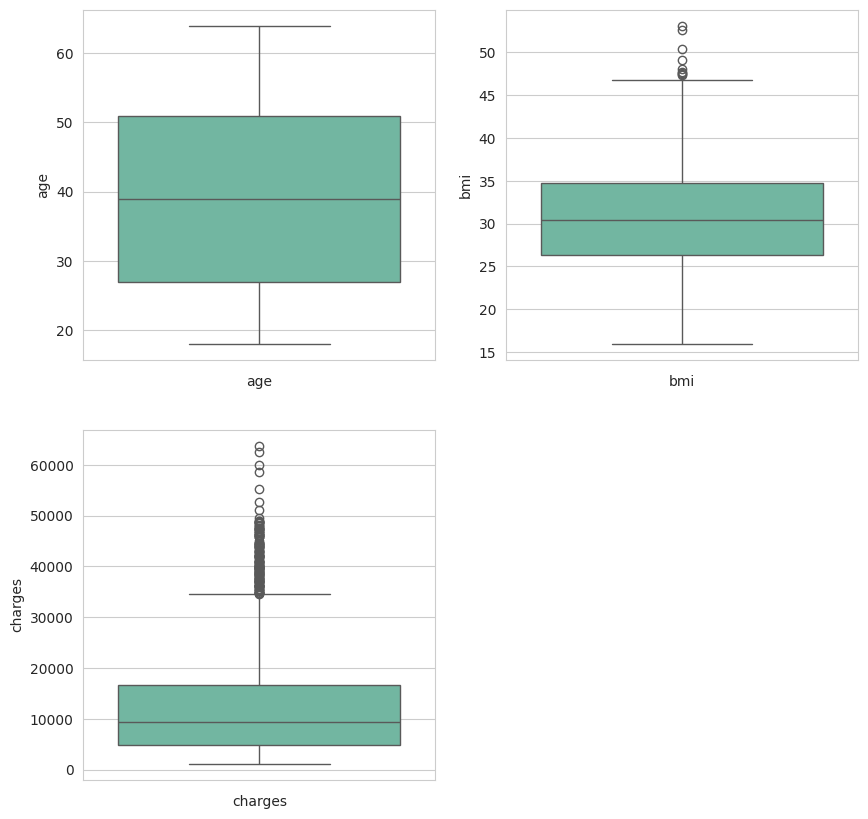

In [ ]:
fig = plt.figure(figsize=(10,10))

counter = 0

for col in numeric_columns:
    sub = fig.add_subplot(2, 2, counter+1)
    g = sns.boxplot(data=df[col])
    plt.xlabel(col)
    counter = counter + 1

In [ ]:
def detect_outliers(data_column):
    Q1 = data_column.quantile(0.25)
    Q3 = data_column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data_column[(data_column < lower_bound) | (data_column > upper_bound)]
    return outliers.tolist()

In [ ]:
outlier_data = {}
for col in numeric_columns:
    outliers = detect_outliers(df[col])
    outlier_counts = len(outliers)
    outlier_percentages = (outlier_counts / len(df[col])) * 100
    outlier_data[col] = {'count': outlier_counts, 'percentage': outlier_percentages}

    print(col)
    print("No. of IQR-based outliers:", outlier_counts)
    print("--------------------------------")

age
No. of IQR-based outliers: 0
--------------------------------
bmi
No. of IQR-based outliers: 9
--------------------------------
charges
No. of IQR-based outliers: 139
--------------------------------


# Data Encoding and Preprocessing

In [ ]:
X = df.drop('charges', axis=1)
y = df['charges']

In [ ]:
# Split the data into training, validation and test sets  (80% training + validation i.e. train_full, 20% test)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training set into actual training and validation sets (80% train, 20% validation of the training data)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

In [ ]:
# Encode the categorical features using one-hot encoding
# Scale numerical features using standard scaler
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns[:-1]),
        ('cat', categorical_transformer, categorical_columns)])

X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)
X_test = preprocessor.transform(X_test)

In [ ]:
# Target Variable Scaling
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_val_scaled = scaler_y.transform(y_val.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Model Design and Implementation

In [ ]:
def create_mlp_model(input_shape):
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=input_shape))

    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.2))

    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.2))

    model.add(layers.Dense(128, activation='relu'))

    model.add(layers.Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

    return model

input_shape = X_train.shape[1:]

mlp_model = create_mlp_model(input_shape)

history1 = mlp_model.fit(X_train, y_train_scaled, validation_data=(X_val, y_val_scaled),
                        epochs=100, batch_size=32)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.7624 - mae: 0.6320 - val_loss: 0.2996 - val_mae: 0.3589
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2456 - mae: 0.3351 - val_loss: 0.2253 - val_mae: 0.3442
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1912 - mae: 0.3145 - val_loss: 0.2167 - val_mae: 0.3057
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1891 - mae: 0.3028 - val_loss: 0.2182 - val_mae: 0.2691
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1527 - mae: 0.2531 - val_loss: 0.2119 - val_mae: 0.2561
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1379 - mae: 0.2326 - val_loss: 0.2052 - val_mae: 0.3085
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1597 - mae: 0.2736 - val_loss: 0.2134 - val_mae: 0.2839
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1727 - mae: 0.2679 - val_loss: 0.2059 - val_mae: 0.2709
Epoch 9/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.12

In [ ]:
mlp_model.summary()

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_112 (Dense)                    │ (None, 512)                 │           6,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_59 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_113 (Dense)                    │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_60 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_114 (Dense)                    │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_115 (Dense)                    │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 513,029 (1.96 MB)

 Trainable params: 171,009 (668.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 342,020 (1.30 MB)

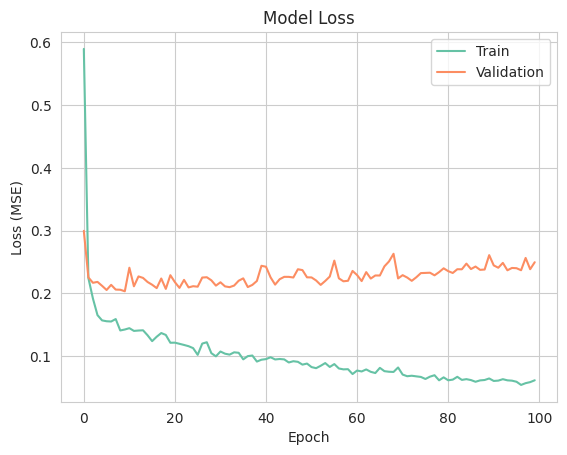

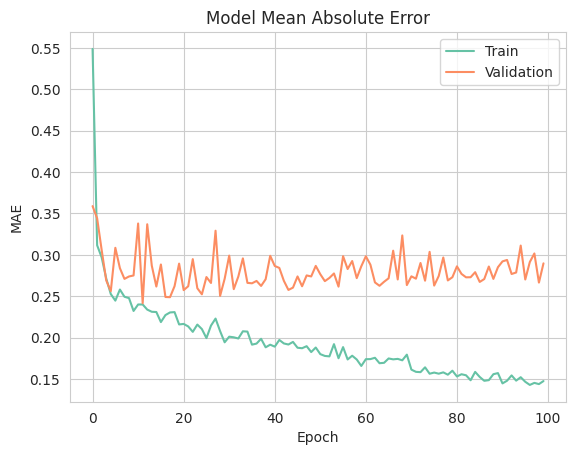

In [133]:
# Training & validation loss plot
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# MAE plot
plt.plot(history1.history['mae'])
plt.plot(history1.history['val_mae'])
plt.title('Model Mean Absolute Error')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


# Hyperparameter Tuning

In [134]:
layer_configs = [
    [128, 64],
    [64, 32, 16],
    [256, 128, 64],
    [512, 256, 128, 64]
]

def build_mlp_model(layer_config, input_shape):
    model = Sequential()
    model.add(Dense(layer_config[0], input_dim=input_shape, activation='relu'))
    model.add(layers.Dropout(0.2))

    for units in layer_config[1:]:
        model.add(Dense(units, activation='relu'))
        model.add(layers.Dropout(0.2))

    model.add(Dense(1))
    model.compile(optimizer=Adam(), loss='mse', metrics=['mae'])
    return model

# Track the best model and configuration
best_model = None
best_config = None
best_val_mae = float('inf')

for config in layer_configs:
    print(f"Testing model with layers: {config}")

    model = build_mlp_model(config, X_train.shape[1])

    hist = model.fit(X_train, y_train_scaled, validation_data=(X_val, y_val_scaled), epochs=100, batch_size=32, verbose=0)
    val_mae = hist.history['val_mae'][-1]
    print(f"Validation MAE for config {config}: {val_mae}")

    if val_mae < best_val_mae:
        best_val_mae = val_mae
        best_model = model
        best_config = config

print(f"\nBest layer configuration: {best_config}")
print(f"Best validation MAE: {best_val_mae}")

test_loss, test_mae = best_model.evaluate(X_test, y_test_scaled, verbose=0)
print(f"Test MAE with best configuration: {test_mae}")

Testing model with layers: [128, 64]


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Validation MAE for config [128, 64]: 0.26961657404899597
Testing model with layers: [64, 32, 16]
Validation MAE for config [64, 32, 16]: 0.2730545103549957
Testing model with layers: [256, 128, 64]
Validation MAE for config [256, 128, 64]: 0.26347848773002625
Testing model with layers: [512, 256, 128, 64]
Validation MAE for config [512, 256, 128, 64]: 0.2963302731513977

Best layer configuration: [256, 128, 64]
Best validation MAE: 0.26347848773002625
Test MAE with best configuration: 0.2297145575284958


# Model Evaluation and Analysis

Best Model

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


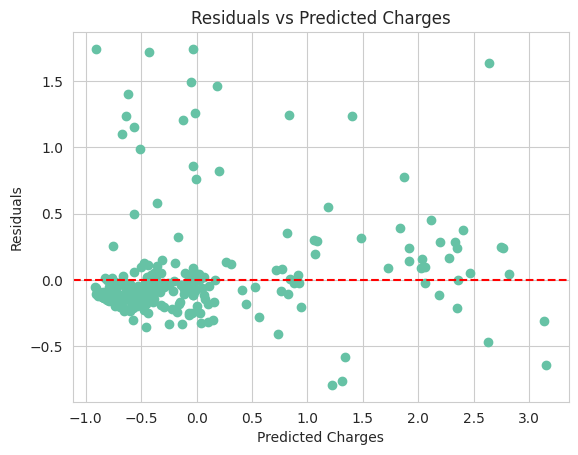

In [ ]:
y_pred = best_model.predict(X_test)
residuals = y_test_scaled - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Charges')
plt.show()

In [135]:
mae = mean_absolute_error(y_test_scaled, y_pred)
mse = mean_squared_error(y_test_scaled, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

Mean Absolute Error: 0.22839150032421435
Mean Squared Error: 0.15489754776062753


First MLP Model:

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


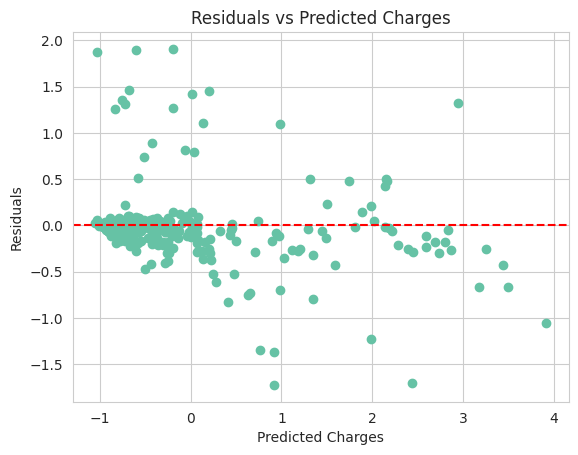

In [136]:
y_pred = mlp_model.predict(X_test)
residuals = y_test_scaled - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Charges')
plt.show()

In [138]:
mae = mean_absolute_error(y_test_scaled, y_pred)
mse = mean_squared_error(y_test_scaled, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

Mean Absolute Error: 0.24005949258361436
Mean Squared Error: 0.20020081184258387
